Import libraries

In [1]:
import tensorflow.keras as keras
import tensorflow as tf
#print(tf.__version__)

Let's load the data:

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

Let's look at the data:

In [3]:
#print(x_train[0])

We can also visualize this:

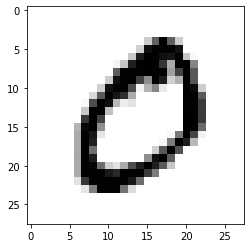

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

It looks like it is a 0. We can check if that is true.

In [5]:
print(y_train[1])

0


It's always a good practice to normalize data. Let's do that before we continue.

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

Let's check one more time:

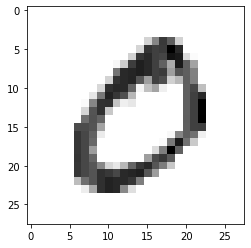

In [7]:
#print(x_train[1])
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

Time to build our model.

In [8]:
model = tf.keras.models.Sequential()

We need to take the 28x28 input image, and make it a flat 1x784.

In [9]:
model.add(tf.keras.layers.Flatten())

Now, we add hidden layers using the simplest neural network layer: a Dense layer.

In [10]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

Adding another identical layer for good measure.

In [11]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

Now, we add an output layer with 10 nodes.

In [12]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

We now "compile" the model. In this step, we pass the settings to optimize/train the model.

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

We then fit the model.

In [14]:
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2665 - accuracy: 0.9219
Epoch 2/3
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1087 - accuracy: 0.9660
Epoch 3/3
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0728 - accuracy: 0.9772


We now test our model on data we didn't use to train the model.

In [15]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.1080 - accuracy: 0.9657
0.10798262290768325
0.9657


We save the model, reload it, and make predictions using test data. 

In [16]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict(x_test)
print(predictions)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets
[[2.0205517e-09 8.0360847e-09 5.5850956e-06 ... 9.9999082e-01
  2.6364440e-08 2.4081049e-07]
 [5.8953447e-08 1.3247239e-04 9.9968815e-01 ... 1.4548973e-09
  5.4337661e-06 5.0708916e-08]
 [3.7823729e-06 9.9869043e-01 2.5537837e-04 ... 3.2439752e-04
  5.9810519e-04 1.4840463e-06]
 ...
 [3.7950403e-09 3.8727896e-07 1.0719309e-07 ... 8.4747444e-05
  3.5370110e-08 5.8330057e-05]
 [4.9968875e-08 2.9183624e-07 2.1522935e-08 ... 4.8880787e-07
  8.5999389e-05 5.9456429e-08]
 [2.1950433e-05 1.7134179e-06 1.3444596e-05 ... 1.0881210e-08
  9.9011118e-08 1.2041123e-07]]


To get the predicted number, we can do the following:

In [17]:
import numpy as np
print(np.argmax(predictions[1]))

2


...and then check if we got that right.

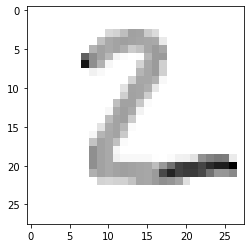

In [18]:
plt.imshow(x_test[1],cmap=plt.cm.binary)
plt.show()

Useful resources:
- https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/